In [1]:
import numpy

import rscha2d
import fibonacci_sphere
import trig
import constants
import coords
import gauge

from matplotlib import pyplot, colors, ticker
import matplotlib
%matplotlib nbagg
matplotlib.rcParams["font.family"] = "Fira Sans"

In [2]:
db_path = "../data/rscha2d/bd_11mayo_naveg_piracy.csv"
filtered_db_path = "../data/rscha2d/bd_11mayo_naveg_piracy_q.csv"

In [3]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
knots_bd = numpy.arange(-2100, 2050, 50)

In [4]:
#THIS IS A DUMMY MODEL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
model = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d,
                       cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                       knots=knots_bd,
                       spatial_reg=1e-4, temporal_reg=1e-2)

In [5]:
model.add_data("../data/rscha2d/bd_11mayo_naveg_piracy.csv")

In [6]:
inliers = model.ids[model.quality]

In [7]:
f = open(db_path, "r")
f2 = open(filtered_db_path, "w")
    
for i, line in enumerate(f):
    if i in inliers:
        f2.write(line)

In [8]:
import geofield
import xyzfield

sha = geofield.SHADIFData("../data/sha.dif.14k/coeff_SHA.DIF.14k.dat",
                          "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

In [9]:
base_gcoefs = numpy.loadtxt("../data/rscha2d/coef_base.dat").T

In [10]:
base_years = numpy.array(sha.years)[numpy.array(sha.years) >= -1000]

In [11]:
knots = numpy.arange(-1100, 2000, 50)
model2 = rscha2d.Model()
model2.set_model_params(theta_c, phi_c, theta_0d,
                        cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2,
                        knots=knots,
                        spatial_reg=1e-4, temporal_reg=1e-2,
                        refmodel={"years" : base_years,
                                  "coefs" : base_gcoefs})

In [12]:
model2.add_data("../data/rscha2d/bd_11mayo_naveg_piracy_q.csv")
model2.D_weight = 1./ (~model2.nan_D).sum()
model2.I_weight = 1./ (~model2.nan_I).sum()
model2.F_weight = 1./ (~model2.nan_F).sum()

In [13]:
solution = model2.solve(complete=True)
g = solution["coefs"]

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6366.087515, ...,  6363.382858]), array([ 0.264736, ...,  0.206587]), array([ 1.289396, ..., -2.113453]), 0.4537856055185257, array([ -3.013645e+05, ...,  -1.250473e+01]), array([ -3.394987e+05, ...,  -1.510790e+01]), array([ -1.114411e+06, ...,   4.2

In [14]:
name_at = "Paris"
theta_at, phi_at = numpy.deg2rad((90-48.8, 2.35))

In [15]:
near = (trig.angulardist(theta_at, phi_at, model2.thetav, model2.phiv) 
        < numpy.arctan(900/constants.a_r))

D_reloc, I_reloc, F_reloc = trig.relocate(model2.D_o, model2.I_o, model2.F_o,
                                          model2.thetav, model2.phiv, theta_at, phi_at)

In [16]:
t_cur = numpy.linspace(-1000, 2000, 400)
t_cur, r_cur, theta_cur, phi_cur = coords.curve_at(t_cur, constants.a_r, theta_at, phi_at)
D_avg, I_avg, F_avg = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, g)
D_base, I_base, F_base = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, numpy.zeros_like(g))

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6371.2, ...,  6371.2]), array([ 0.245882, ...,  0.245882]), array([-2.179337, ..., -2.179337]), 0.4537856055185257, array([ -4.093276, ..., -15.032426]), array([-27.218904, ..., -28.819285]), array([ 59.132166, ...,  58.211525]), 11182.736964578742)
_

In [17]:
model2.set_model_params(theta_c, phi_c, theta_0d,
                        cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2,
                        knots=knots,
                        spatial_reg=1e-4, temporal_reg=1e-2,
                        refmodel={"years" : sha.years,
                                  "coefs" : sha.gcomp})

In [18]:
solution = model2.solve(complete=True)
g = solution["coefs"]

In [19]:
D_avg_sha, I_avg_sha, F_avg_sha = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, g)
D_base_sha, I_base_sha, F_base_sha = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, numpy.zeros_like(g))

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6371.2, ...,  6371.2]), array([ 0.245882, ...,  0.245882]), array([-2.179337, ..., -2.179337]), 0.4537856055185257, array([-1.128675, ..., -8.276478]), array([-24.458373, ..., -18.351807]), array([ 50.941416, ...,  51.591099]), 11182.736964578742)
___

In [20]:
sai_gc = numpy.loadtxt("../data/sai.csv", delimiter=",")[:, 1:]
sai_years = numpy.loadtxt("../data/sai.csv", delimiter=",")[:, 0]

In [21]:
model2.set_model_params(theta_c, phi_c, theta_0d,
                        cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2,
                        knots=knots,
                        spatial_reg=1e-4, temporal_reg=1e-2,
                        refmodel={"years" : sai_years,
                                  "coefs" : sai_gc})

In [22]:
solution = model2.solve(complete=True)
g = solution["coefs"]

In [23]:
D_avg_sai, I_avg_sai, F_avg_sai = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, g)
D_base_sai, I_base_sai, F_base_sai = model2.synth_data(t_cur, r_cur, theta_cur, phi_cur, numpy.zeros_like(g))

________________________________________________________________________________
[Memory] Calling rscha_r.rscha_condition_matrix_dif...
rscha_condition_matrix_dif(( array([ 0.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 0.,  1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  1.164403e-12,   3.646726e+00,   3.646726e+00,   7.958865e+00,
         6.368397e+00,   6.368397e+00,   1.127449e+01,   1.127449e+01,
         8.955337e+00,   8.955337e+00])), 
( array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.]),
  array([ 1., -1.,  0.,  2., -2.,  1., -1.,  3., -3.]),
  array([  3.646726,   3.646726,   7.958865,   6.368397,   6.368397,
        11.274494,  11.274494,   8.955337,   8.955337])), 
array([ 0,  1, -1,  2, -2]), array([ 6371.2, ...,  6371.2]), array([ 0.245882, ...,  0.245882]), array([-2.179337, ..., -2.179337]), 0.4537856055185257, array([-1.066819, ..., -7.983309]), array([-25.607346, ...,  -9.325517]), array([ 59.726704, ...,  53.768481]), 11182.736964578742)
___

<IPython.core.display.Javascript object>


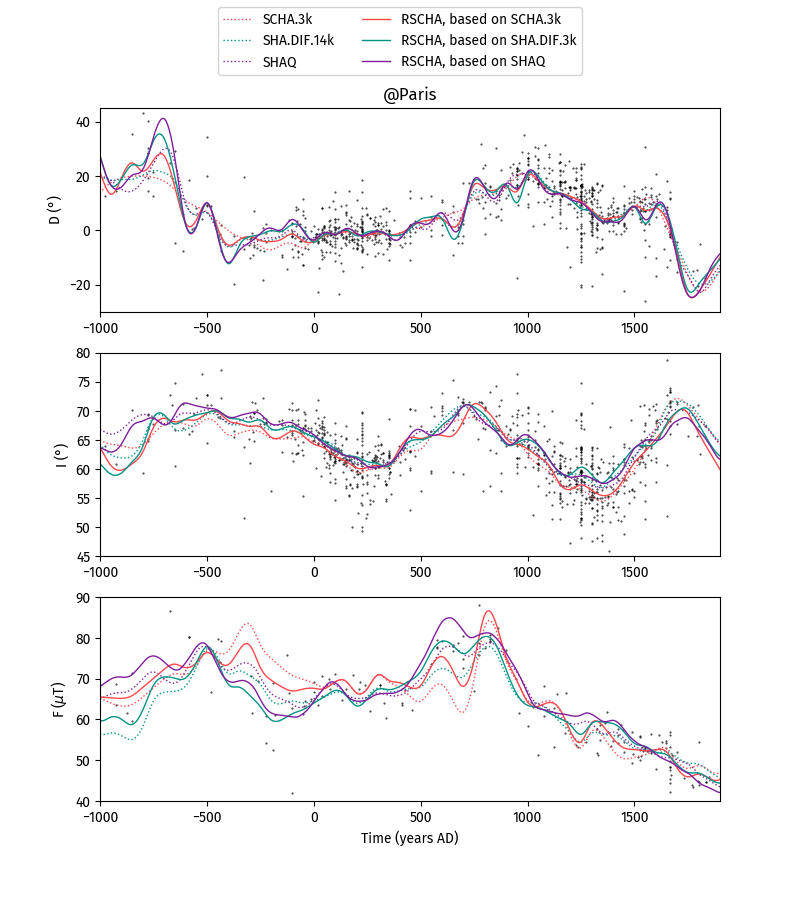

In [50]:
matplotlib.rcParams.update({'font.size': 10})
fig, (ax0, ax1, ax2) = pyplot.subplots(3,1, figsize=(8,9))

common={"marker" : ".", "s" : 1, "alpha" : 0.8, "color" : "xkcd:black"}
sha_style = {"color" : "xkcd:dark red", "linestyle" : "--", "linewidth" : 2}
rscha_style = {"color" : "xkcd:light red", "alpha" : 0.005}

curve_color = "xkcd:light red"
curve_style = {"color" : curve_color, "linewidth" : 1}
curve2_style = {"color" : "xkcd:teal", "linewidth" : 1}
curve3_style = {"color" : "xkcd:purple", "linewidth" : 1}
error_style = {"color" : curve_color, "linestyle" : "--"}
fill_style = {"color" : "xkcd:cream", "alpha" : 1.0}

ax0.set_ylabel("D (°)")
ax1.set_ylabel("I (°)")
ax2.set_ylabel("F ($\mu $T)")
ax0.set_title("@{}".format(name_at))

#ax0.plot(t_cur, numpy.rad2deg(D_avg+2*D_std), **error_style)
#ax0.plot(t_cur, numpy.rad2deg(D_avg-2*D_std), **error_style)
#ax0.fill_between(t_cur, numpy.rad2deg(D_avg+2*D_std), numpy.rad2deg(D_avg-2*D_std), **fill_style)
ax0.scatter(model2.tv[near], numpy.rad2deg(D_reloc)[near], **common)
ax0.plot(t_cur, numpy.rad2deg(D_base), linestyle=":", **curve_style, label = "SCHA.3k")
ax0.plot(t_cur, numpy.rad2deg(D_base_sha), linestyle=":", **curve2_style, label = "SHA.DIF.14k")
ax0.plot(t_cur, numpy.rad2deg(D_base_sai), linestyle=":", **curve3_style, label = "SHAQ")
ax0.plot(t_cur, numpy.rad2deg(D_avg), **curve_style, label = "RSCHA, based on SCHA.3k")
ax0.plot(t_cur, numpy.rad2deg(D_avg_sha), **curve2_style, label = "RSCHA, based on SHA.DIF.3k")
ax0.plot(t_cur, numpy.rad2deg(D_avg_sai), **curve3_style, label = "RSCHA, based on SHAQ")
ax0.set_ybound(-30, 45)

#ax1.plot(t_cur, numpy.rad2deg(I_avg+2*I_std), **error_style)
#ax1.plot(t_cur, numpy.rad2deg(I_avg-2*I_std), **error_style)
#ax1.fill_between(t_cur, numpy.rad2deg(I_avg+2*I_std), numpy.rad2deg(I_avg-2*I_std), **fill_style)
ax1.scatter(model2.tv[near], numpy.rad2deg(I_reloc)[near], **common)
ax1.plot(t_cur, numpy.rad2deg(I_base), linestyle=":", **curve_style)
ax1.plot(t_cur, numpy.rad2deg(I_base_sha), linestyle=":", **curve2_style)
ax1.plot(t_cur, numpy.rad2deg(I_base_sai), linestyle=":", **curve3_style)
ax1.plot(t_cur, numpy.rad2deg(I_avg), **curve_style)
ax1.plot(t_cur, numpy.rad2deg(I_avg_sha), **curve2_style)
ax1.plot(t_cur, numpy.rad2deg(I_avg_sai), **curve3_style)
ax1.set_ybound(45, 80)

#ax2.plot(t_cur, F_avg+2*F_std, **error_style)
#ax2.plot(t_cur, F_avg-2*F_std, **error_style)
#ax2.fill_between(t_cur, F_avg+2*F_std, F_avg-2*F_std, **fill_style)
ax2.plot(t_cur, F_base, linestyle=":", **curve_style)
ax2.plot(t_cur, F_base_sha, linestyle=":", **curve2_style)
ax2.plot(t_cur, F_base_sai, linestyle=":", **curve3_style)
ax2.plot(t_cur, F_avg, **curve_style)
ax2.plot(t_cur, F_avg_sha, **curve2_style)
ax2.plot(t_cur, F_avg_sai, **curve3_style)
ax2.scatter(model2.tv[near], F_reloc[near], **common)
ax2.set_ybound(40, 90)
ax2.set_xlabel("Time (years AD)")
    
for ax in (ax0, ax1, ax2):
    ax.set_xbound(-1000, 1900)
    ax.set_facecolor("xkcd:white")
    
fig.legend(ncol=2, loc="upper center")